# **Machine Learning model for gas production prediction**
# **Part 2: Exploratory Data Anlysis (EDA) and Feature Engineering**
### **Author:** M. Sc. Alberto M. Palacio Bastos - Data Scientist
### **Objective:** Build a model to estimate gas production.
### **Dataset:** http://huy302.github.io/interview_dataset.csv


### **Features description:**
- **treatment company**: The treatment company who provides treatment service.
- **azimuth**: Well drilling direction.
- **md (ft)**: Measure depth.
- **tvd (ft)**: True vertical depth.
- **date on production**: First production date.
- **operator**: The well operator who performs drilling service.
- **footage lateral length**: Horizontal well section.
- **well spacing**: Distance to the closest nearby well.
- **porpoise deviation**: How much max (in ft.) a well deviated from its horizontal.
- **porpoise count**: How many times the deviations (porpoises) occurred.
- **shale footage**: How much shale (in ft) encountered in a horizontal well.
- **acoustic impedance**: The impedance of a reservoir rock (ft/s * g/cc).
- **log permeability**: The property of rocks that is an indication of the ability for fluids (gas or liquid) to flow through rocks
- **porosity**: The percentage of void space in a rock. It is defined as the ratio of the volume of the voids or pore space divided by the total volume. It is written as either a decimal fraction between 0 and 1 or as a percentage.
- **poisson ratio**: Measures the ratio of lateral strain to axial strain at linearly elastic region.
- **water saturation**: The ratio of water volume to pore volume.
- **toc**: Total Organic Carbon, indicates the organic richness (hydrocarbon generative potential) of a reservoir rock.
- **vcl**: The amount of clay minerals in a reservoir rock.
- **p-velocity**: The velocity of P-waves (compressional waves) through a reservoir rock (ft/s).
- **s-velocity**: The velocity of S-waves (shear waves) through a reservoir rock (ft/s).
- **youngs modulus**: The ratio of the applied stress to the fractional extension (or shortening) of the reservoir rock parallel to the tension (or compression) (giga pascals).
- **isip**: When the pumps are quickly stopped, and the fluids stop moving, these friction pressures disappear and the resulting pressure is called the instantaneous shut-in pressure, ISIP.
- **breakdown pressure**: The pressure at which a hydraulic fracture is created/initiated/induced.
- **pump rate**: The volume of liquid that travels through the pump in a given time. A hydraulic fracture is formed by pumping fluid into a wellbore at a rate sufficient to increase pressure at the target depth, to exceed that of the fracture gradient (pressure gradient) of the rock.
- **total number of stages**: Total stages used to fracture the horizontal section of the well.
- **proppant volume**: The amount of proppant in pounds used in the completion of a well (lbs).
- **proppant fluid ratio**: The ratio of proppant volume/fluid volume (lbs/gallon).
- **production**: The 12 months cumulative gas production (mmcf).

## 2.1. Import libraries and packages

In [2]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualizaton
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# for displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for displaying plots in notebook cell
%matplotlib inline

# Loaging confirmation
print("Libraries Loaded:\n",
      " Numpy:", np.__version__, "\n",
      " Pandas:", pd.__version__, "\n",
      " Matplotlib:", matplotlib.__version__, "\n",
      " Seaborn:", sns.__version__)

Libraries Loaded:
  Numpy: 1.26.2 
  Pandas: 2.2.1 
  Matplotlib: 3.8.3 
  Seaborn: 0.13.0


## 2.2. Load the cleaned dataset

In [3]:
# Load dataset
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,treatment_company,operator,age,azimuth,md,tvd,footage_lateral_length,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production
0,1,1,6,-32.279999,19148,6443.0,11966.0,6.33,12,1093,30123.20,0.68,0.34,5.00,0.42,13592.23,6950.44,30.82,4149.0,83,56,21568792.0,1.23,5614.947951
1,2,2,10,-19.799999,15150,7602.0,6890.0,1.28,4,0,30951.61,1.85,0.19,4.22,0.74,11735.04,7162.45,29.72,5776.0,102,33,9841307.0,1.47,2188.836707
2,3,1,6,-26.879999,14950,5907.0,8793.0,2.03,6,3254,28900.25,0.29,0.33,4.69,0.61,13227.81,6976.93,30.99,4628.0,88,62,17116240.0,1.67,1450.033022
3,4,1,12,-49.099998,11098,6538.0,4234.0,6.00,23,7470,32826.08,0.73,0.20,4.40,0.56,12646.34,6799.37,26.20,4582.0,100,11,3749559.0,0.77,1060.764407
4,5,3,12,5.560000,10549,7024.0,2972.0,11.87,9,3637,26740.05,0.47,0.33,4.66,0.58,13192.18,7046.91,31.18,4909.0,94,9,6690705.0,1.32,607.530385


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment_company       837 non-null    int64  
 1   operator                837 non-null    int64  
 2   age                     837 non-null    int64  
 3   azimuth                 837 non-null    float64
 4   md                      837 non-null    int64  
 5   tvd                     837 non-null    float64
 6   footage_lateral_length  837 non-null    float64
 7   porpoise_deviation      837 non-null    float64
 8   porpoise_count          837 non-null    int64  
 9   shale_footage           837 non-null    int64  
 10  acoustic_impedance      837 non-null    float64
 11  log_permeability        837 non-null    float64
 12  poisson_ratio           837 non-null    float64
 13  toc                     837 non-null    float64
 14  vcl                     837 non-null    fl

In [5]:
df.describe(include='all')

,treatment_company,operator,age,azimuth,md,tvd,footage_lateral_length,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,8.370000e+02,837.000000,837.000000
mean,7.185185,10.179211,8.967742,-33.685620,14038.634409,7105.002389,6430.654731,52.089343,9.440860,3732.008363,33503.180824,0.620143,0.303883,4.611574,0.631505,12774.309211,6933.513369,30.274146,4971.883571,84.997611,29.216249,1.055555e+07,1.166607,1964.779373
std,5.016992,7.694147,2.211359,17.248393,2622.397345,898.128567,2568.522631,120.242255,7.008737,3713.641364,2095.244985,0.394867,0.045082,0.579607,0.315156,709.766992,176.566158,1.478911,741.512288,12.634539,15.864704,6.390903e+06,0.379922,1370.473384
min,1.000000,1.000000,5.000000,-87.110001,8670.000000,4935.000000,1713.000000,0.030000,0.000000,0.000000,26740.050000,-0.030000,0.190000,1.630000,0.030000,10631.340000,6380.470000,25.840000,2225.000000,2.000000,9.000000,1.760960e+05,0.030000,76.107246
25%,3.000000,4.000000,7.000000,-44.509998,12180.000000,6407.000000,4654.000000,4.660000,4.000000,0.000000,32718.750000,0.310000,0.270000,4.510000,0.470000,12230.400000,6812.050000,29.720000,4432.000000,77.000000,17.000000,6.129300e+06,0.950000,1009.916439
50%,7.000000,8.000000,9.000000,-33.905735,13685.000000,6971.000000,5942.000000,11.350000,8.000000,3519.000000,34601.010000,0.520000,0.330000,4.680000,0.580000,13160.760000,6957.800000,30.840000,4965.485374,86.000000,26.000000,9.060627e+06,1.120000,1575.091143
75%,10.000000,14.000000,11.000000,-23.350000,15456.000000,7820.000000,7885.000000,31.270000,13.000000,5993.000000,34828.160000,0.870000,0.340000,4.810000,0.630000,13272.110000,7037.210000,31.130000,5484.000000,95.000000,39.000000,1.352534e+07,1.320000,2641.927052
max,31.000000,35.000000,13.000000,21.959999,27797.000000,9639.000000,19849.000000,1106.130000,39.000000,17763.000000,38057.630000,1.940000,0.350000,6.860000,2.050000,14501.580000,7491.530000,33.100000,9295.000000,110.000000,110.000000,4.195037e+07,5.410000,8880.671151


## 2.3. Check for multicollinearity between independent variables (features)

Considering that the machine learning model to be trained and tested is a regression model, multicollinearity between dependent variables is not recommended.

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

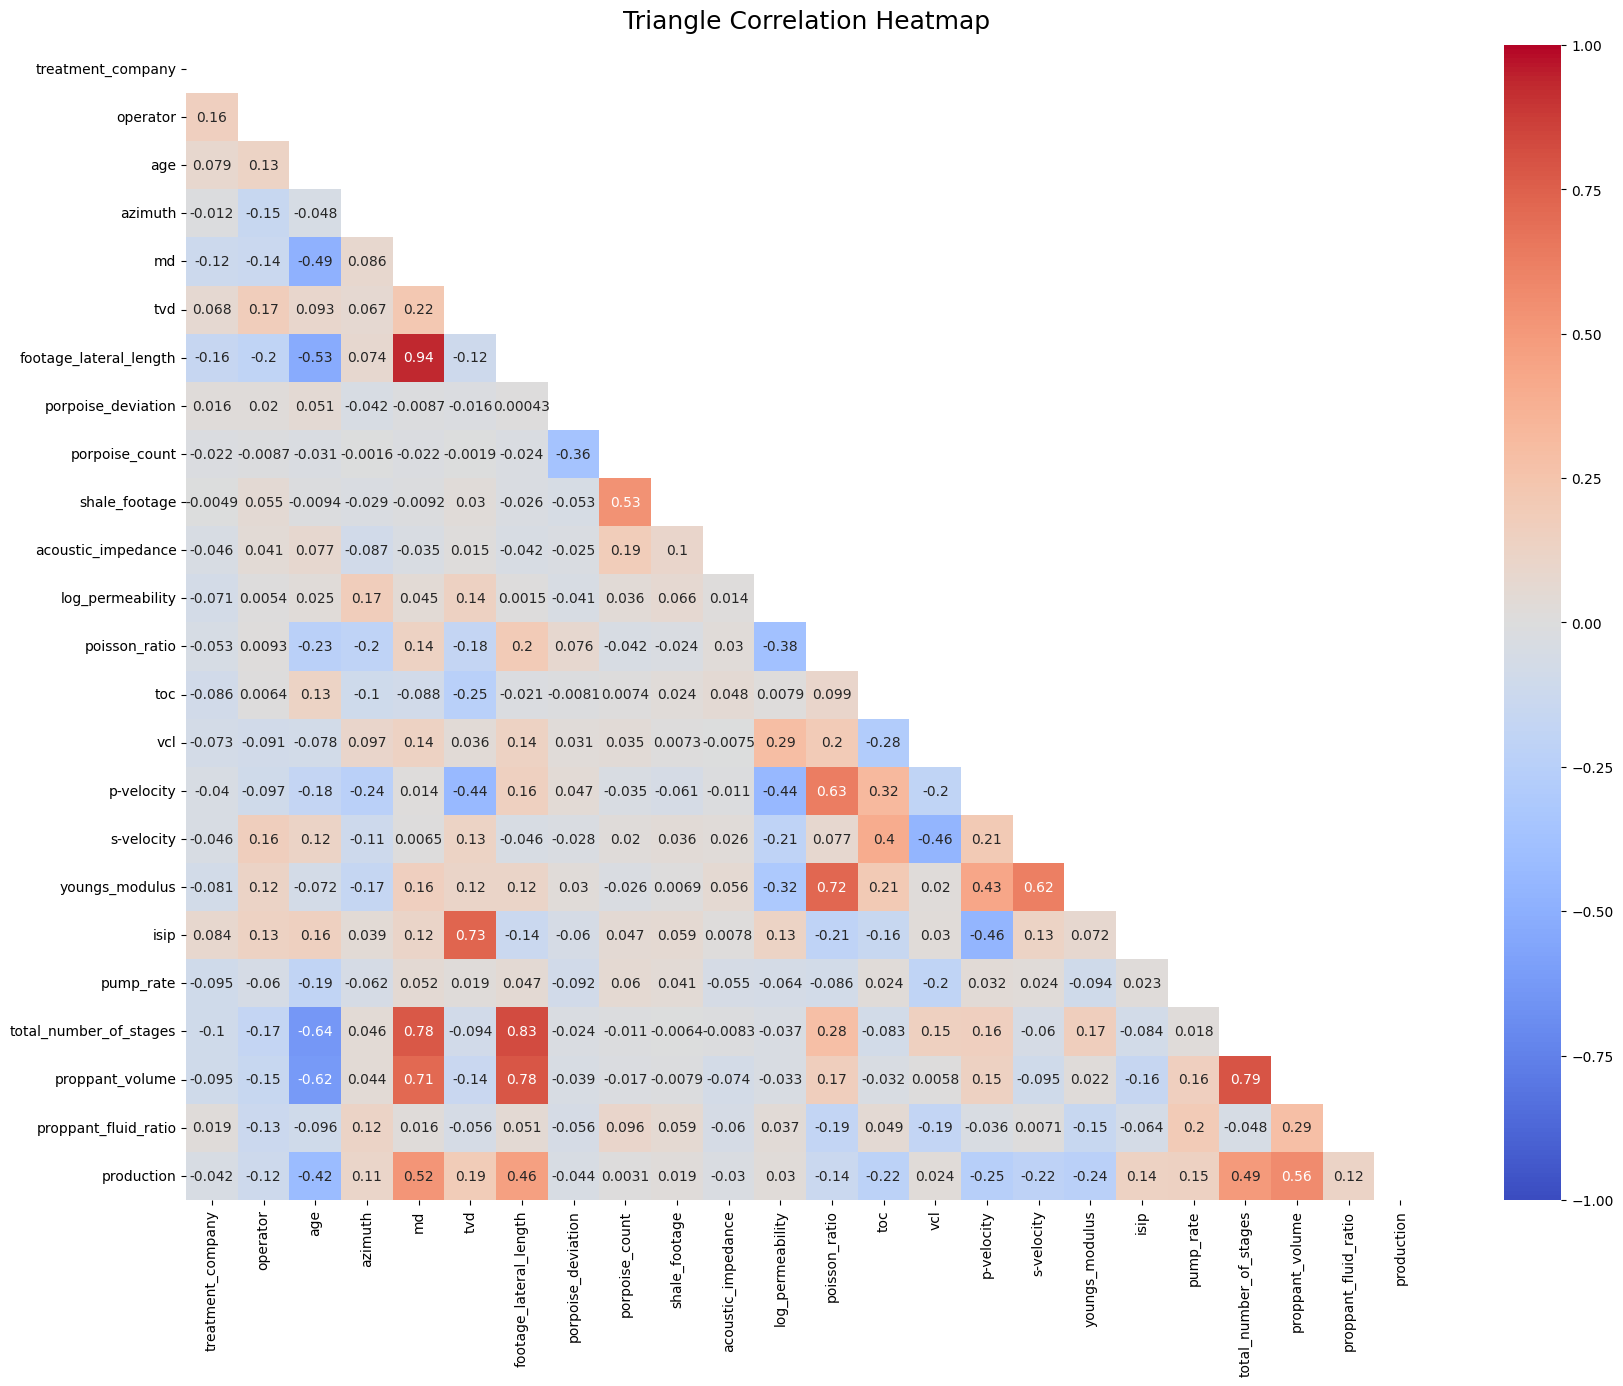

In [6]:
# Construct correlation heatmap
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

There is a high positive correlation between `md` and `footage_lateral_length`: 0.94. 

This is due to that `md` is the measured depth of the well in feet and it includes the horizontal well section, wich is the definition of `footage_lateral_length`.

<Axes: xlabel='md', ylabel='footage_lateral_length'>

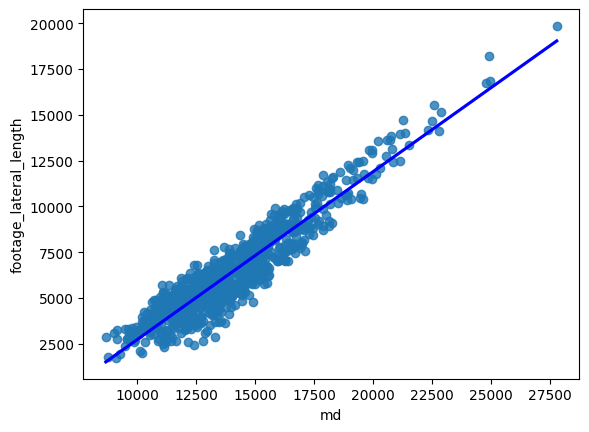

In [7]:
sns.regplot(data=df, x='md', y='footage_lateral_length', ci=0, line_kws=dict(color="b"))

* Taking into count that `md` has a higher corralation with the dependent variable `production` (0.52), than `footage_lateral_length` (0.46), the latter should be dropped from the features feed to the model.

In [8]:
df1 = df.drop(columns='footage_lateral_length')
df1.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,0.34,5.00,0.42,13592.23,6950.44,30.82,4149.0,83,56,21568792.0,1.23,5614.947951
1,2,2,10,-19.799999,15150,7602.0,1.28,4,0,30951.61,1.85,0.19,4.22,0.74,11735.04,7162.45,29.72,5776.0,102,33,9841307.0,1.47,2188.836707
2,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,0.33,4.69,0.61,13227.81,6976.93,30.99,4628.0,88,62,17116240.0,1.67,1450.033022
3,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,0.20,4.40,0.56,12646.34,6799.37,26.20,4582.0,100,11,3749559.0,0.77,1060.764407
4,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,0.33,4.66,0.58,13192.18,7046.91,31.18,4909.0,94,9,6690705.0,1.32,607.530385


There is a high positive correlation between `proppant_volume` and `total_number_of_stages`: 0.79. 

This is due to that `proppant_volume` is the amount of proppant fracturing fluid used in the completion of a well (lbs), and it is correlated to the total stages used to fracture the horizontal section of the well, wich is the definition of `total_number_of_stages`.

<Axes: xlabel='total_number_of_stages', ylabel='proppant_volume'>

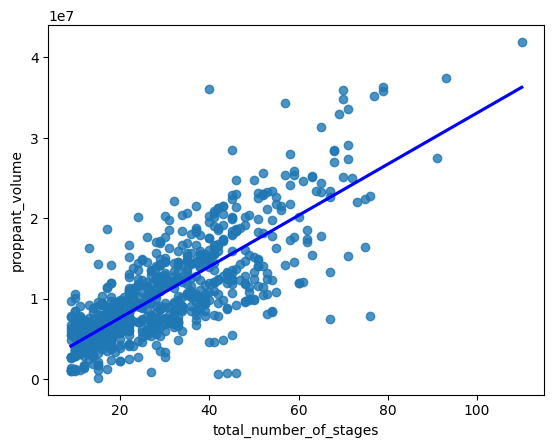

In [9]:
sns.regplot(data=df1, x='total_number_of_stages', y='proppant_volume', ci=0, line_kws=dict(color="b"))

* Considering that `proppant_volume` has a higher correlation with the dependent variable `production` (0.56), than `total_number_of_stages` (0.49), the latter should be dropped from the features feed to the model.

In [10]:
df1 = df1.drop(columns='total_number_of_stages')
df1.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,isip,pump_rate,proppant_volume,proppant_fluid_ratio,production
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,0.34,5.00,0.42,13592.23,6950.44,30.82,4149.0,83,21568792.0,1.23,5614.947951
1,2,2,10,-19.799999,15150,7602.0,1.28,4,0,30951.61,1.85,0.19,4.22,0.74,11735.04,7162.45,29.72,5776.0,102,9841307.0,1.47,2188.836707
2,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,0.33,4.69,0.61,13227.81,6976.93,30.99,4628.0,88,17116240.0,1.67,1450.033022
3,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,0.20,4.40,0.56,12646.34,6799.37,26.20,4582.0,100,3749559.0,0.77,1060.764407
4,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,0.33,4.66,0.58,13192.18,7046.91,31.18,4909.0,94,6690705.0,1.32,607.530385


There is a high positive correlation between `isip` and `tvd`: 0.73. 

This is due to that `isip` is the instantaneous shut-in pressure (when the pumps are quickly stopped, and the fluids stop moving, the friction pressures disappear and its main component is the static hidraulic pressure), and it is correlated to the true vertical depth, wich is the definition of `tvd`.

<Axes: xlabel='isip', ylabel='tvd'>

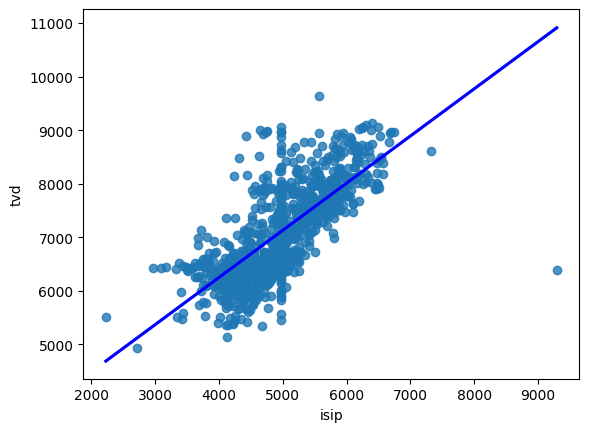

In [11]:
sns.regplot(data=df1, x='isip', y='tvd', ci=0, line_kws=dict(color="b"))

* Considering that `tvd` has a higher correlation with the dependent variable `production` (0.19), than `isip` (0.14), the latter should be dropped from the features feed to the model.

In [12]:
df1 = df1.drop(columns='isip')
df1.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,pump_rate,proppant_volume,proppant_fluid_ratio,production
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,0.34,5.00,0.42,13592.23,6950.44,30.82,83,21568792.0,1.23,5614.947951
1,2,2,10,-19.799999,15150,7602.0,1.28,4,0,30951.61,1.85,0.19,4.22,0.74,11735.04,7162.45,29.72,102,9841307.0,1.47,2188.836707
2,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,0.33,4.69,0.61,13227.81,6976.93,30.99,88,17116240.0,1.67,1450.033022
3,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,0.20,4.40,0.56,12646.34,6799.37,26.20,100,3749559.0,0.77,1060.764407
4,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,0.33,4.66,0.58,13192.18,7046.91,31.18,94,6690705.0,1.32,607.530385


There is a high positive correlation between `md` and `proppant_volume`: 0.71. 

<Axes: xlabel='md', ylabel='proppant_volume'>

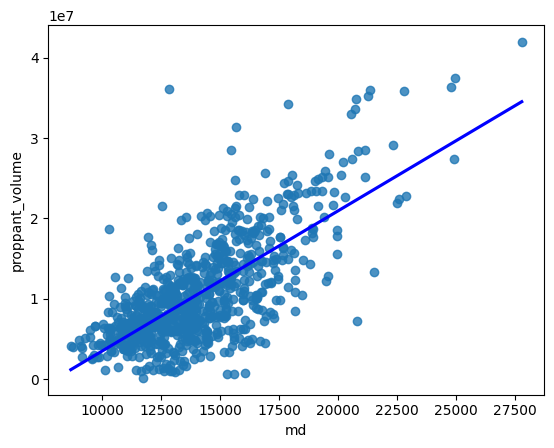

In [13]:
sns.regplot(data=df1, x='md', y='proppant_volume', ci=0, line_kws=dict(color="b"))

This is due to that `md` is s the measured depth of the well in feet, and it is correlated to the the amount of proppant used in the completion of a well (lbs), wich is the definition of `proppant_volume`.

* Given that `proppant_volume` is highly correlated with the target variable `production` (0.56), a new feature will be created as a unitary measure of proppant fluid used in the compretion of the well.

$$
Eq. (1)
$$
$$
\text{unit propant volume}=\frac{\text{proppant volume}}{\text{md}}
$$

In [14]:
# Create new feature `unit_proppant_volume` = 'Brittleness Ratio' defined by Eq. (2)
df1['unit_proppant_volume'] = df1['proppant_volume']/df1['md']
df1 = df1.drop(columns='proppant_volume')
df1.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,poisson_ratio,toc,vcl,p-velocity,s-velocity,youngs_modulus,pump_rate,proppant_fluid_ratio,production,unit_proppant_volume
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,0.34,5.00,0.42,13592.23,6950.44,30.82,83,1.23,5614.947951,1126.425319
1,2,2,10,-19.799999,15150,7602.0,1.28,4,0,30951.61,1.85,0.19,4.22,0.74,11735.04,7162.45,29.72,102,1.47,2188.836707,649.591221
2,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,0.33,4.69,0.61,13227.81,6976.93,30.99,88,1.67,1450.033022,1144.898997
3,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,0.20,4.40,0.56,12646.34,6799.37,26.20,100,0.77,1060.764407,337.858984
4,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,0.33,4.66,0.58,13192.18,7046.91,31.18,94,1.32,607.530385,634.250166


There is a high positive correlation between `youngs_modulus` and `poisson_ratio`: 0.72. 

<Axes: xlabel='poisson_ratio', ylabel='youngs_modulus'>

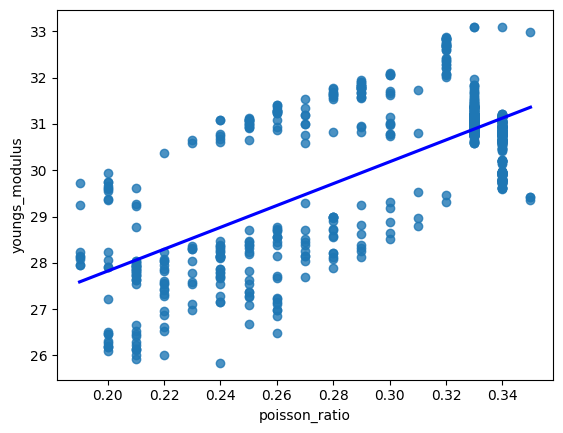

In [15]:
sns.regplot(data=df1, x='poisson_ratio', y='youngs_modulus', ci=0, line_kws=dict(color="b"))

Based on fracture mechanics, a more brittle formation is easier to fracture [1]. As stated by Rickman et al. [2] a empirical correlation such as Young's modulus v. Poisson ratio is convenient to use as a brittleness index to assist in locating the preferred injection intervals. 

Based on the laboratory ultrasonic measurements to derive the relationship between dynamic Young's modulus and Poisson's ratio, Rickman et al. [3] proposed the following equation to evaluate the brittleness:

$$
Eq. (2)
$$
$$
Br = (50/7) (E - 28v + 10.2)
$$

where 
$$Br = \text{Brittleness ratio}$$
$$E = \text{Young's  modulus}$$
$$v = \text{Poisson's  ratio}$$ 

The relationship between Young's modulus and Poisson's ratio to interpret formation brittleness proposed by Rickman et al. [2] in Eq. (1) has been widely used in the petrophysical domain as an indispensable geomechanical component in stimulating unconventional tight reservoirs [3].

[1] A.T. Zehnder, Fracture mechanics, in: Lecture Notes in Applied and Computational Mechanics, vol. 62, Springer Sci. & Business Media, 2012.

[2] R. Rickman, M. Mullen, E. Petre, B. Grieser, D. Kundert, A practical use of shale petrophysics for stimulation design optimization: all shale plays are not clones of the Barnett shale, in: SPE 115258, SPE ATCE, Denver, CO, USA, Sept. 21e24, 2008.

[3] Mao Bai, Why are brittleness and fracability not equivalent in designing hydraulic fracturing in tight shale gas reservoirs, Petroleum, Volume 2, Issue 1, 2016, Pages 1-19, ISSN 2405-6561, https://doi.org/10.1016/j.petlm.2016.01.001.


In [16]:
# Create new feature `br` = 'Brittleness Ratio' defined by Eq. (2)
df1['br'] = (50/7)*((df1['youngs_modulus'])-(28*df1['poisson_ratio'])+10.2)
df1 = df1.drop(columns=['youngs_modulus', 'poisson_ratio'])
df1.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,s-velocity,pump_rate,proppant_fluid_ratio,production,unit_proppant_volume,br
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,5.00,0.42,13592.23,6950.44,83,1.23,5614.947951,1126.425319,225.000000
1,2,2,10,-19.799999,15150,7602.0,1.28,4,0,30951.61,1.85,4.22,0.74,11735.04,7162.45,102,1.47,2188.836707,649.591221,247.142857
2,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,4.69,0.61,13227.81,6976.93,88,1.67,1450.033022,1144.898997,228.214286
3,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,4.40,0.56,12646.34,6799.37,100,0.77,1060.764407,337.858984,220.000000
4,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,4.66,0.58,13192.18,7046.91,94,1.32,607.530385,634.250166,229.571429


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

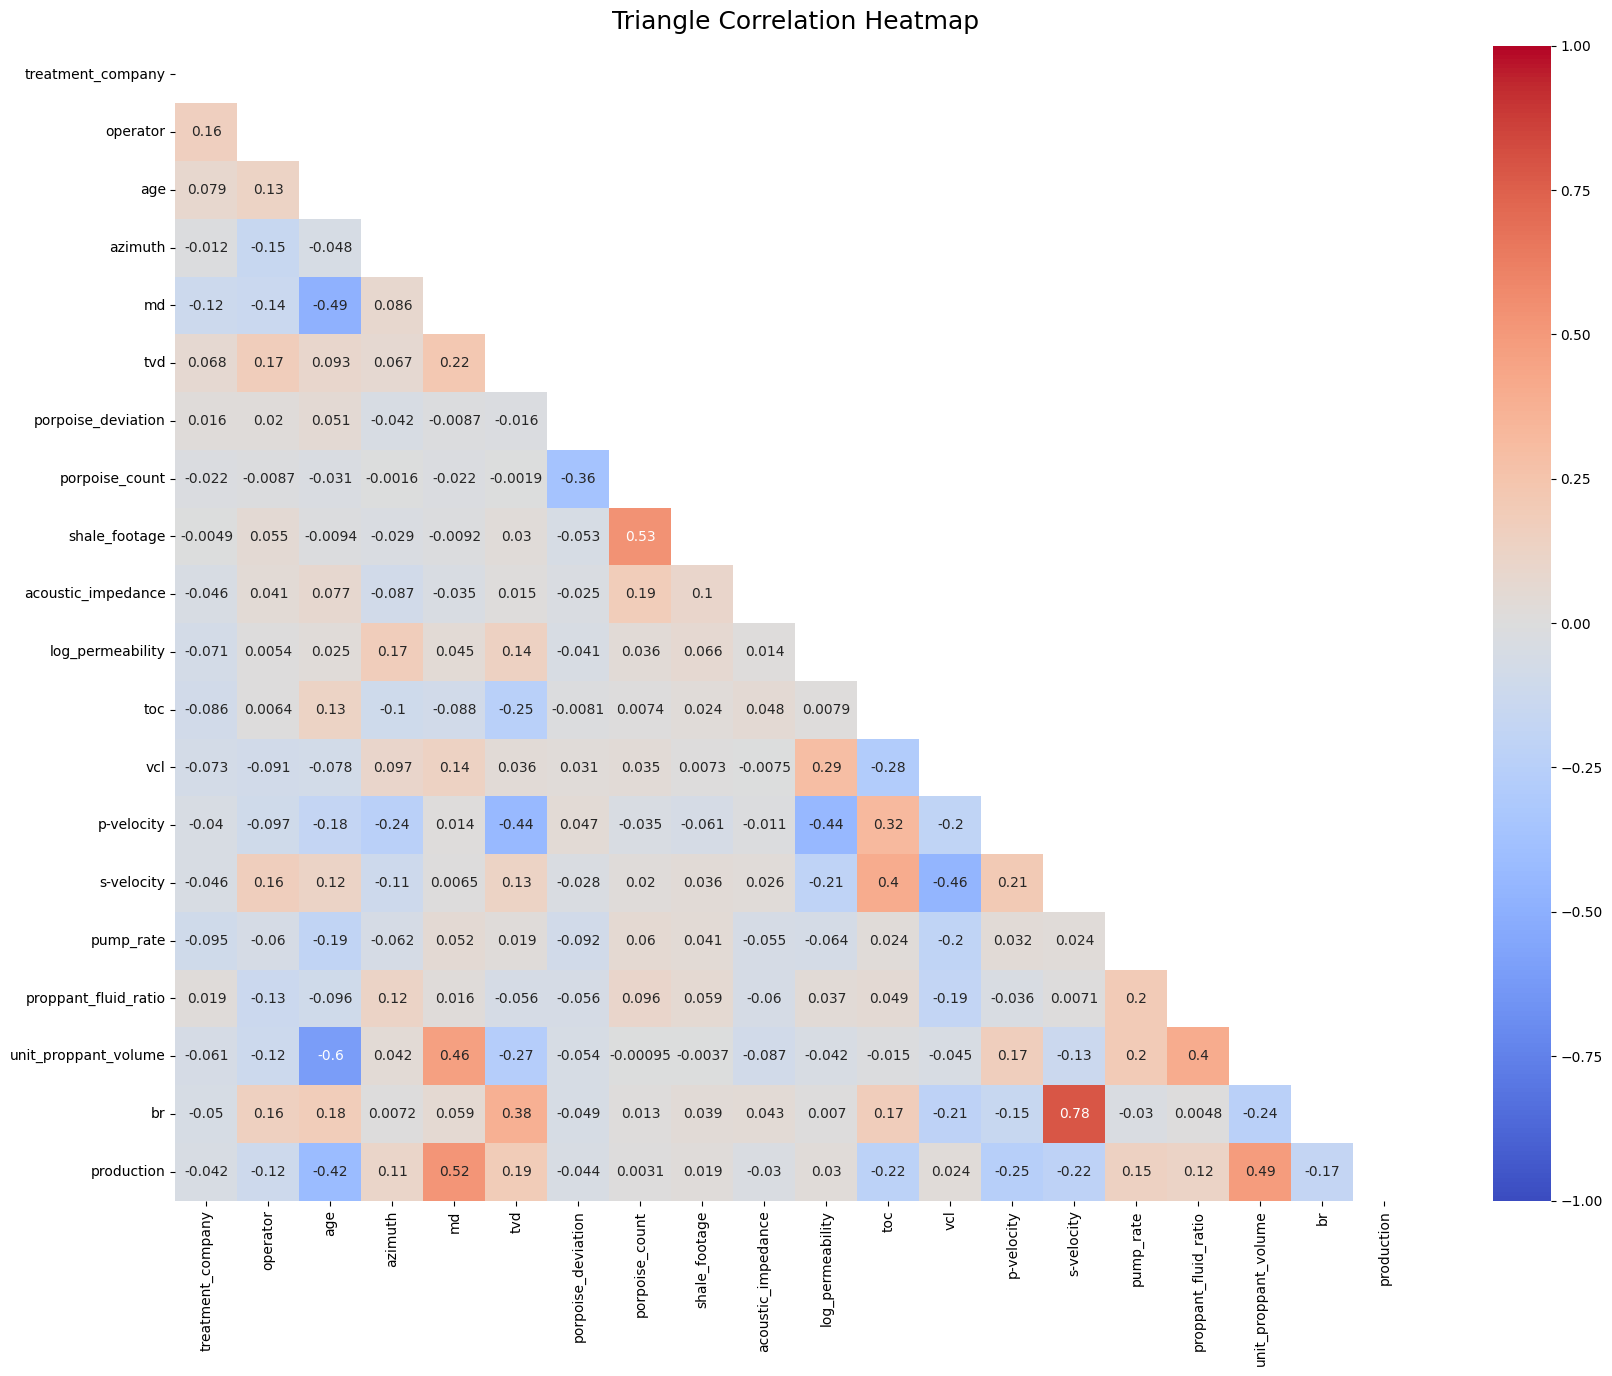

In [17]:
# Construct correlation heatmap with new features
import movecolumn as mc
mc.MoveToLast(df1,'production')

plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

There is a high positive correlation between `br` and `s-velocity`: 0.78. 

<Axes: xlabel='br', ylabel='s-velocity'>

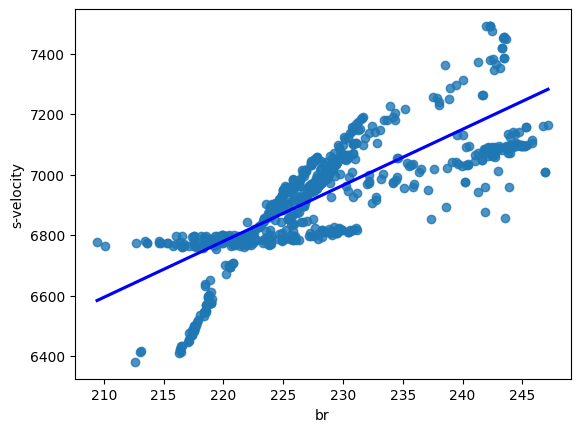

In [18]:
sns.regplot(data=df1, x='br', y='s-velocity', ci=0, line_kws=dict(color="b"))

The scatter plot shows certain structure between 'br' and 's-velocity', this is not recommended for regression model training. This could be considered as evidence of different types of shale rock or other well properties.

It is known that the Young's modulus (component of `br`) is correlated with the shear sound wave velocity (`s-velocity`), and is an indicator of rock porosity in shale deposits [4].

[4] Sharifi, J., Nooraiepour, M., Amiri, M. et al. Developing a relationship between static Young’s modulus and seismic parameters. J Petrol Explor Prod Technol 13, 203–218 (2023). https://doi.org/10.1007/s13202-022-01546-6

* Considering that the shear wave velocity is used to estimate the Young's modulus and other well properties that are already in the dataset, it should be considered dropping this feature.

In [19]:
df1 = df1.drop(columns='s-velocity')
df1.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,5.00,0.42,13592.23,83,1.23,1126.425319,225.000000,5614.947951
1,2,2,10,-19.799999,15150,7602.0,1.28,4,0,30951.61,1.85,4.22,0.74,11735.04,102,1.47,649.591221,247.142857,2188.836707
2,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,4.69,0.61,13227.81,88,1.67,1144.898997,228.214286,1450.033022
3,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,4.40,0.56,12646.34,100,0.77,337.858984,220.000000,1060.764407
4,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,4.66,0.58,13192.18,94,1.32,634.250166,229.571429,607.530385


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

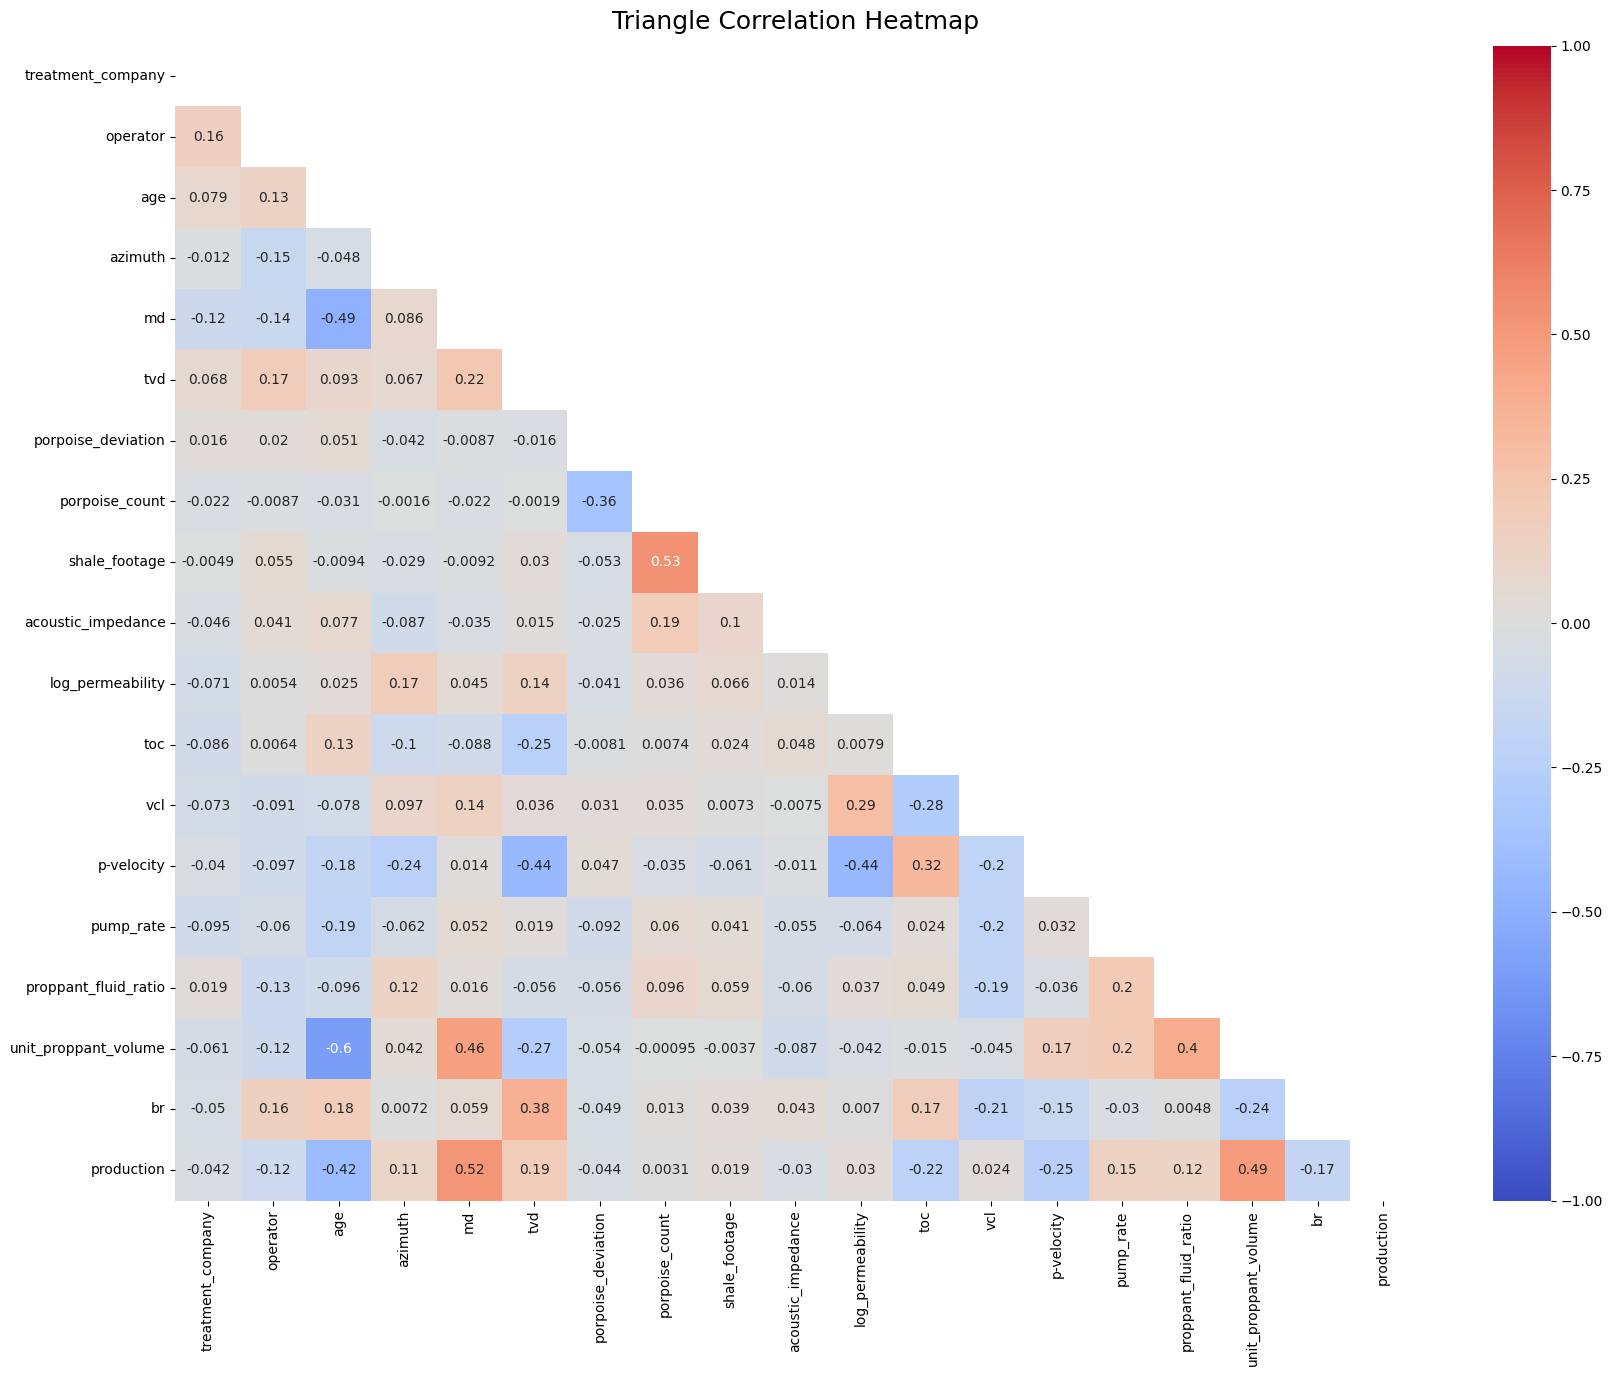

In [20]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

## 2.3. Check for correlations between independent variables (features) and the dependent variable (target: `production`)

<Axes: >

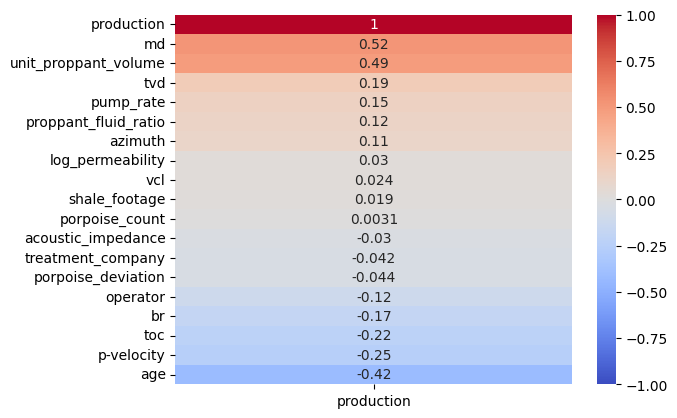

In [21]:
sns.heatmap(df1.corr()[['production']].sort_values(by='production', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

Analyze correlation between `md`: 'measured depth' and `production` 

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'md' and well 'production'")

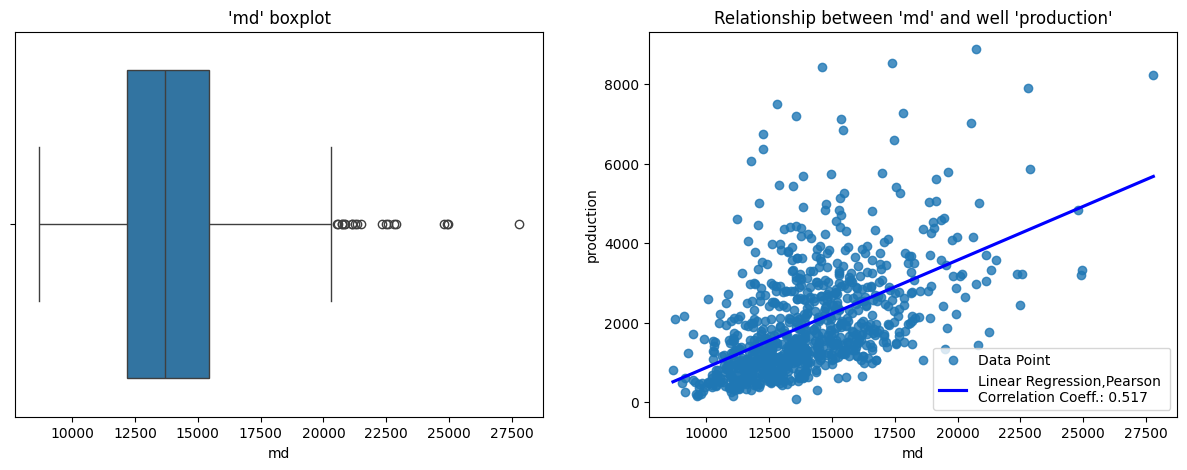

In [22]:
feature = 'md'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'unit_proppant_volume' and well 'production'")

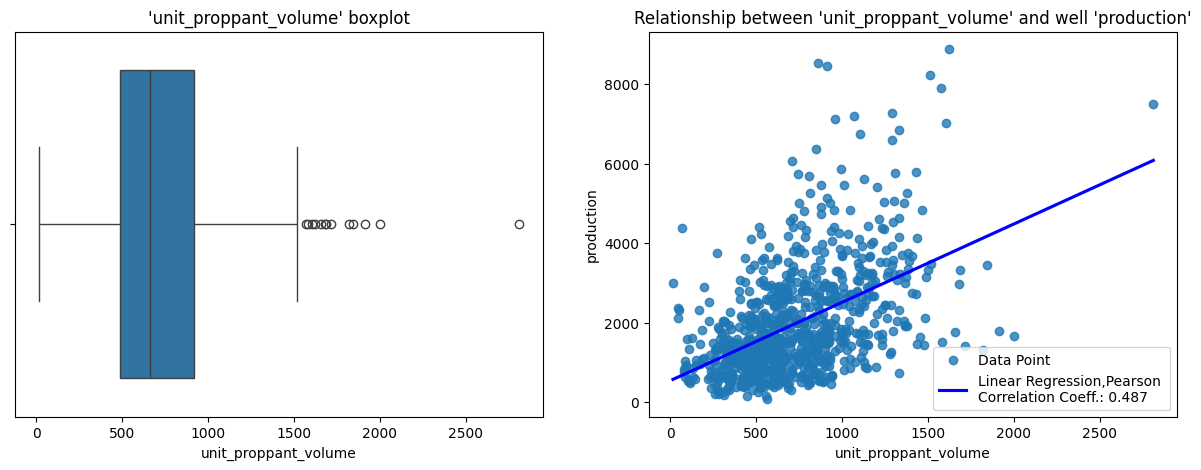

In [23]:
feature = 'unit_proppant_volume'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'tvd' and well 'production'")

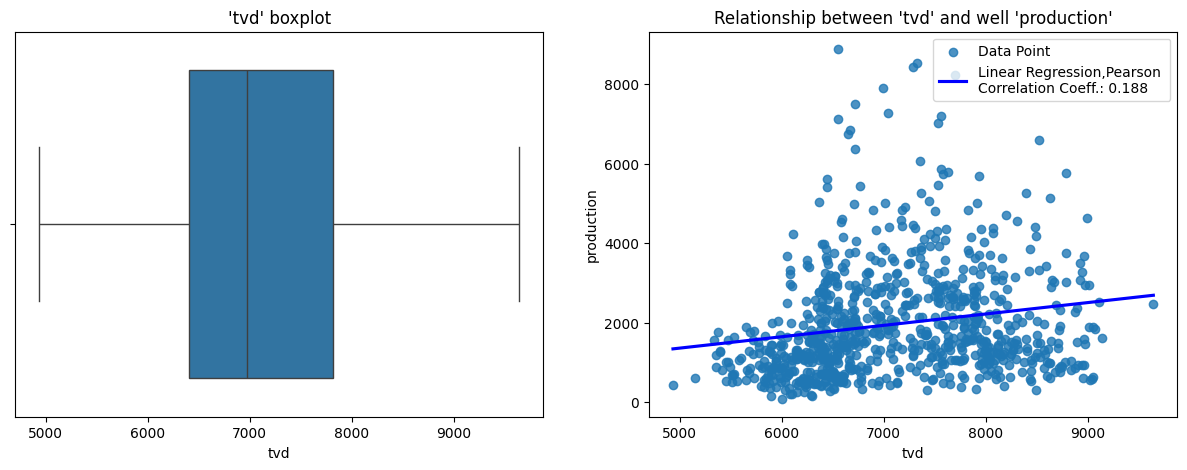

In [24]:
feature = 'tvd'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'pump_rate' and well 'production'")

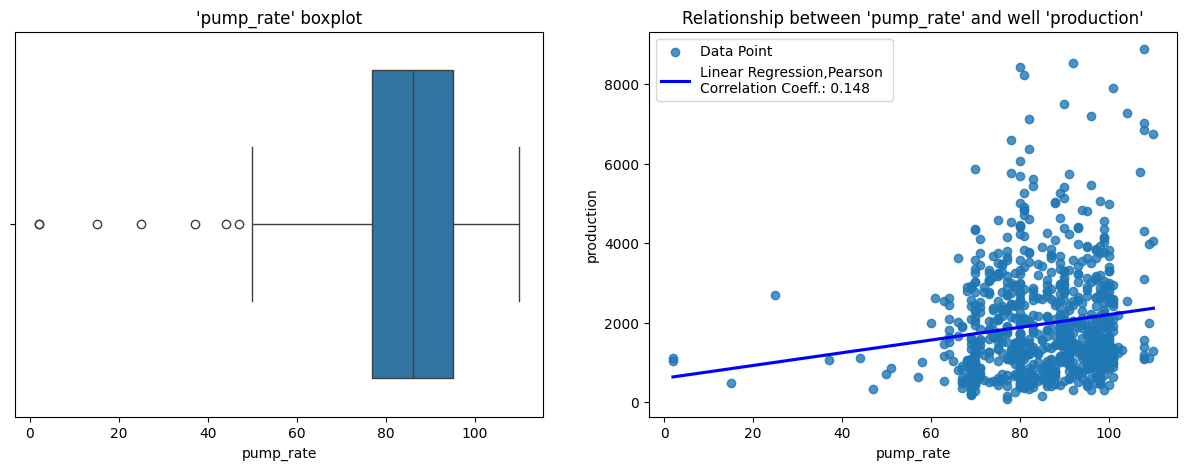

In [25]:
feature = 'pump_rate'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'proppant_fluid_ratio' and well 'production'")

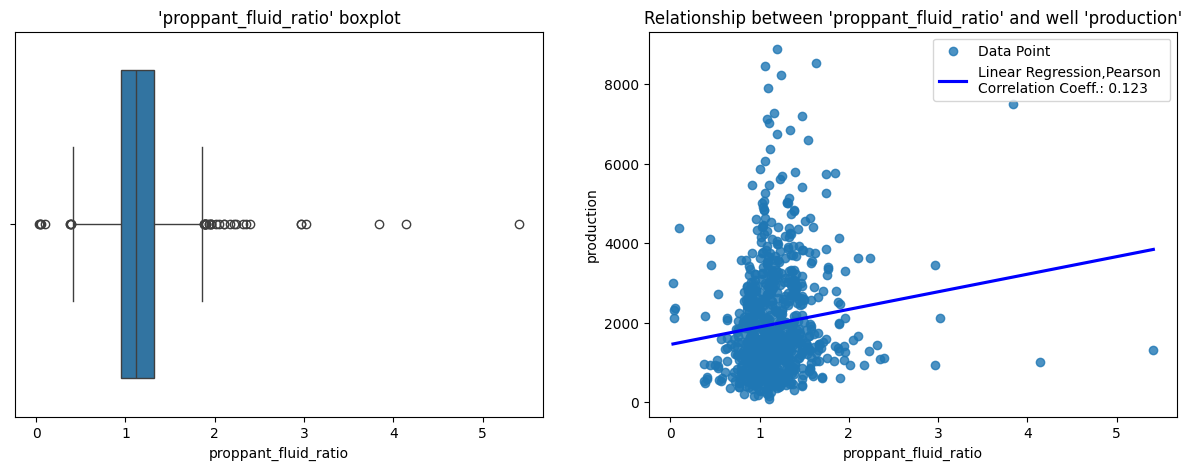

In [26]:
feature = 'proppant_fluid_ratio'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'azimuth' and well 'production'")

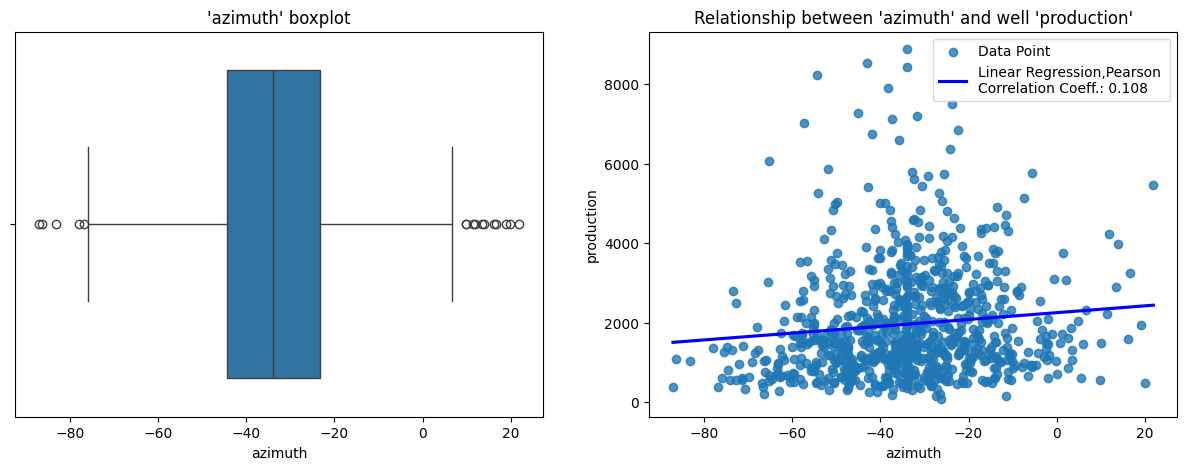

In [27]:
feature = 'azimuth'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'log_permeability' and well 'production'")

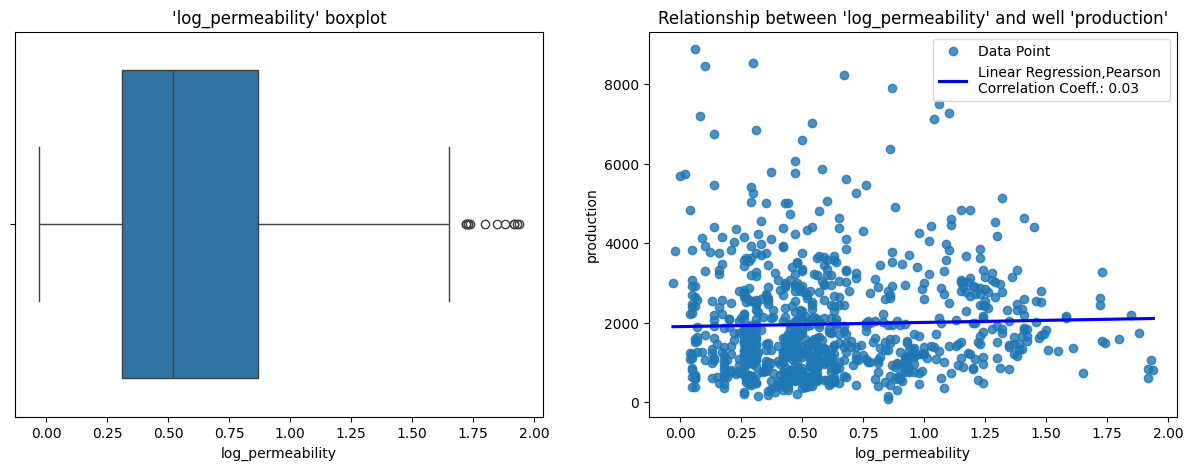

In [28]:
feature = 'log_permeability'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'vcl' and well 'production'")

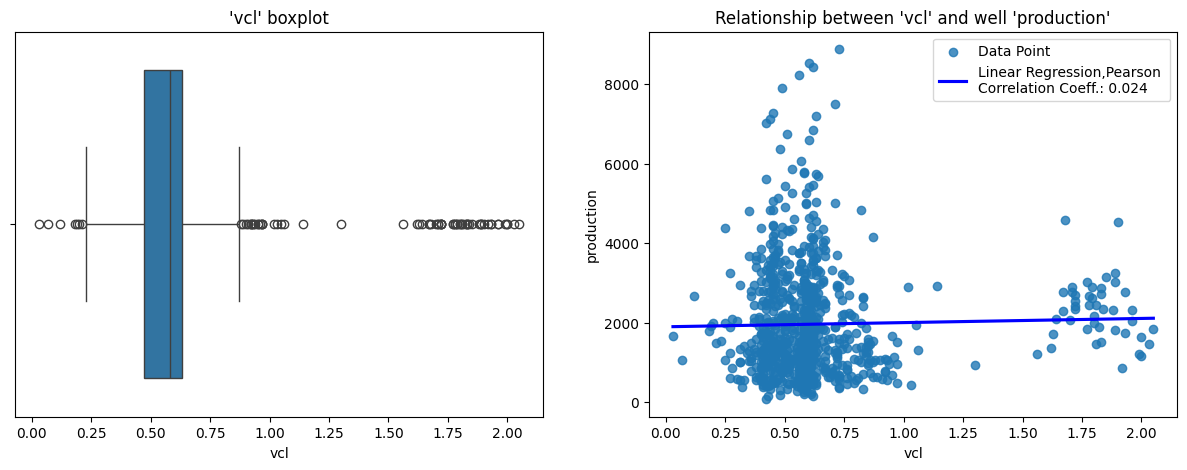

In [29]:
feature = 'vcl'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

Text(0.5, 1.0, "Relationship between 'shale_footage' and well 'production'")

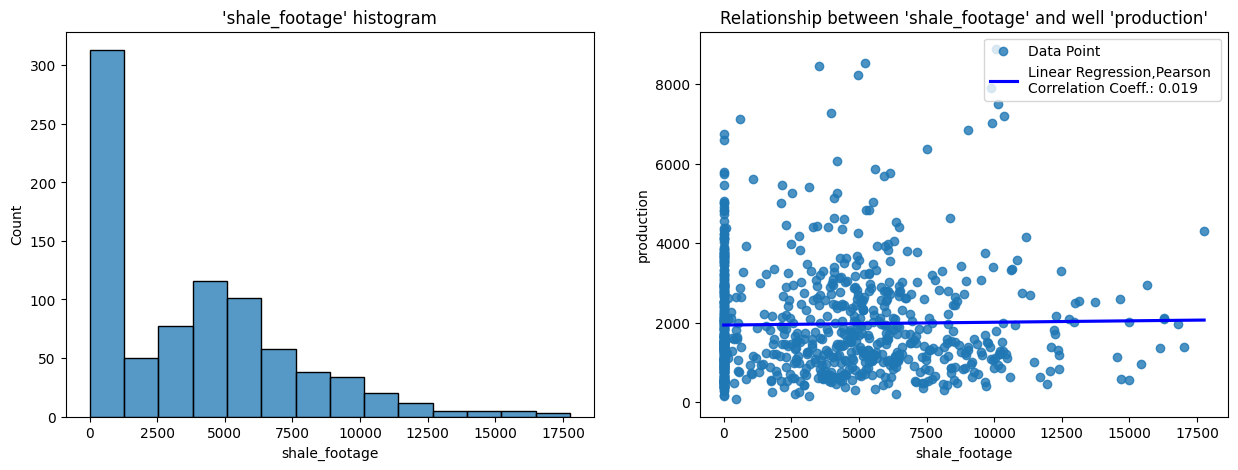

In [30]:
feature = 'shale_footage'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.histplot(data=df1, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' histogram")

sns.regplot(data=df1, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df1[feature].corr(df1['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

In [31]:
df2 = df1[df1['shale_footage']!=0]
df2.describe(include='all')

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,7.188172,10.550179,8.980287,-33.720175,14019.544803,7134.817204,48.497401,10.216846,5598.012545,33497.191631,0.641559,4.617725,0.635143,12760.380950,84.908602,1.166344,711.843444,228.592550,1975.340606
std,5.141314,7.704844,2.254373,17.640298,2579.793702,894.173353,114.091305,7.493476,3199.126349,2083.625387,0.395899,0.571091,0.314107,694.199383,12.680180,0.399427,336.311838,7.598468,1410.460908
min,1.000000,1.000000,5.000000,-83.260002,8765.000000,4935.000000,0.030000,1.000000,65.000000,26740.050000,-0.020000,1.630000,0.070000,10874.410000,2.000000,0.040000,45.182288,210.071429,76.107246
25%,3.000000,5.000000,7.000000,-45.434999,12191.500000,6429.500000,4.537500,5.000000,3528.750000,32883.510000,0.310000,4.500000,0.470000,12231.567500,77.000000,0.960000,470.215128,224.428571,1026.213567
50%,7.000000,8.000000,9.000000,-33.905735,13728.500000,7017.500000,11.175000,8.000000,5085.000000,34557.480000,0.535000,4.680000,0.580000,13108.170000,86.000000,1.120000,660.611896,227.714286,1578.913503
75%,10.000000,14.000000,11.000000,-23.147500,15474.000000,7875.750000,28.872500,15.000000,7198.500000,34807.207500,0.907500,4.810000,0.630000,13263.267500,95.000000,1.320000,912.345522,230.482143,2614.691492
max,31.000000,35.000000,13.000000,21.959999,27797.000000,9067.000000,979.460000,39.000000,17763.000000,38057.630000,1.930000,6.860000,2.000000,13834.170000,110.000000,5.410000,2812.418985,246.928571,8880.671151


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'shale_footage' and well 'production'")

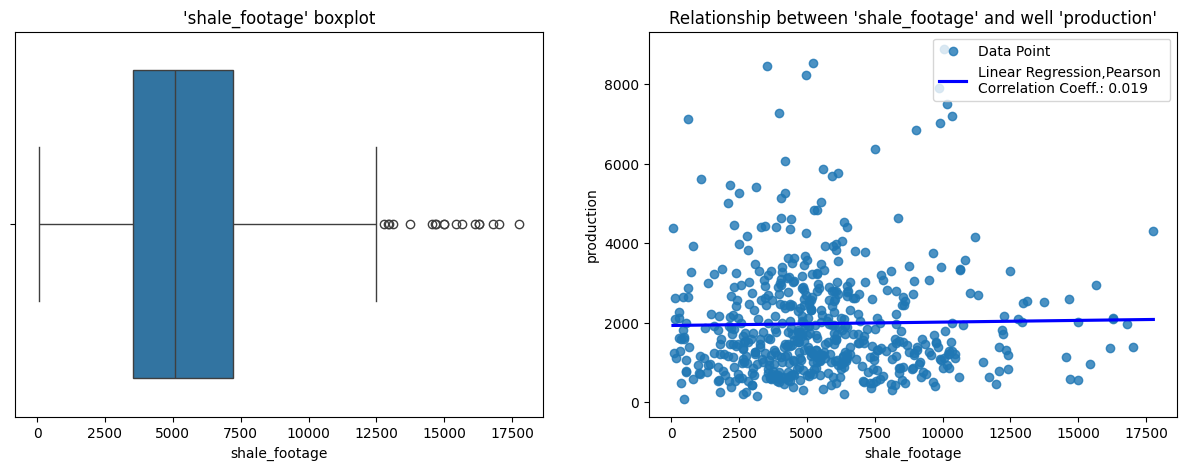

In [32]:
feature = 'shale_footage'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'porpoise_count' and well 'production'")

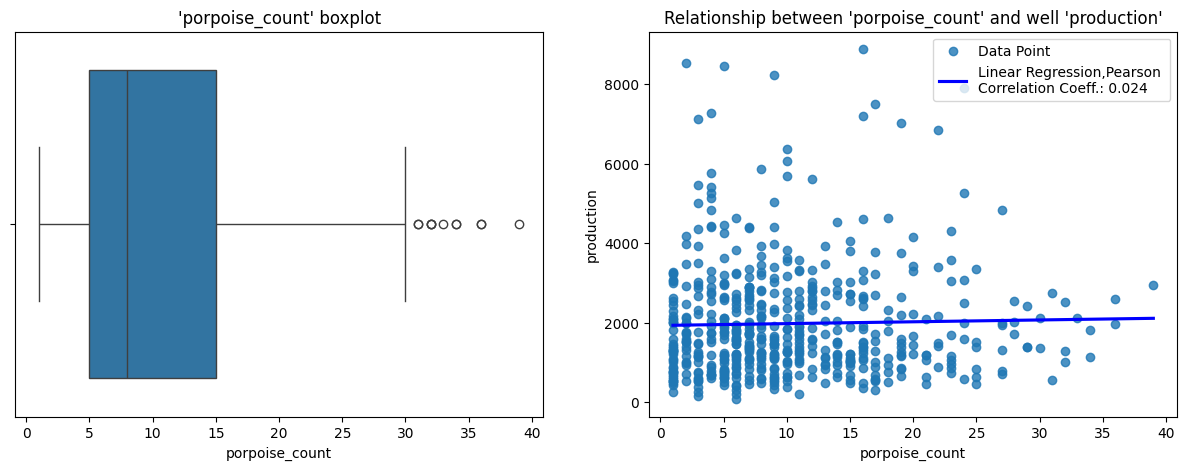

In [33]:
feature = 'porpoise_count'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'acoustic_impedance' and well 'production'")

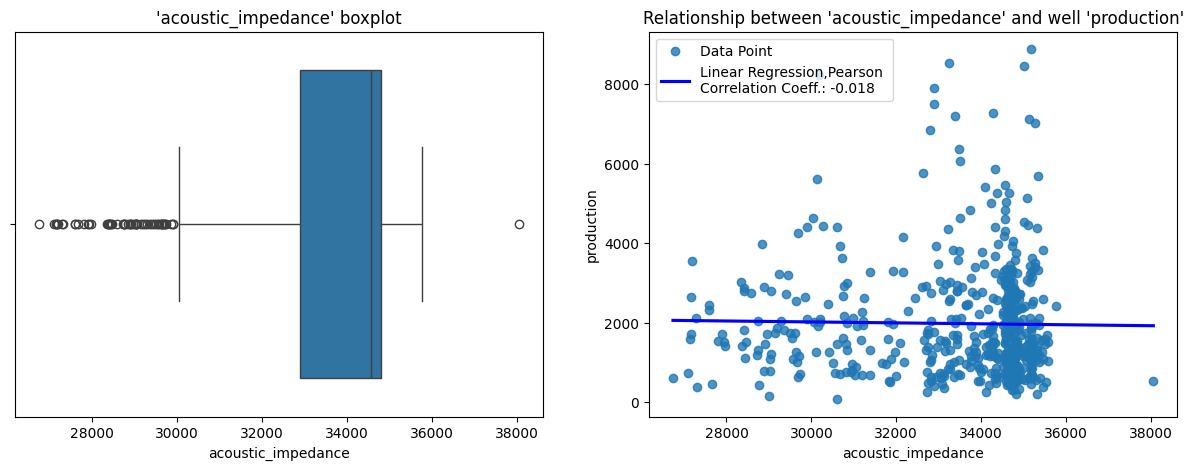

In [34]:
feature = 'acoustic_impedance'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'treatment_company' and well 'production'")

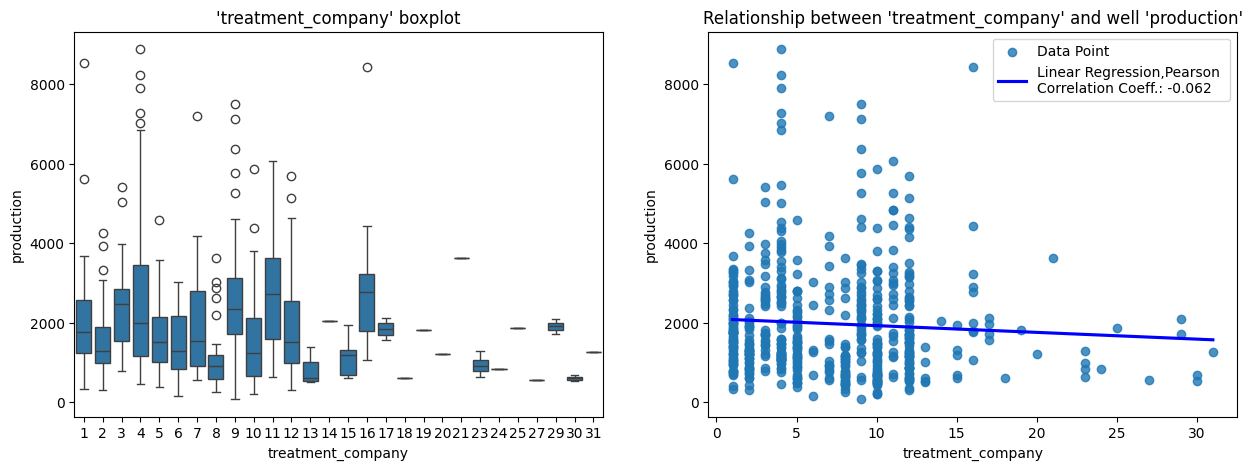

In [35]:
feature = 'treatment_company'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, y='production', ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'porpoise_deviation' and well 'production'")

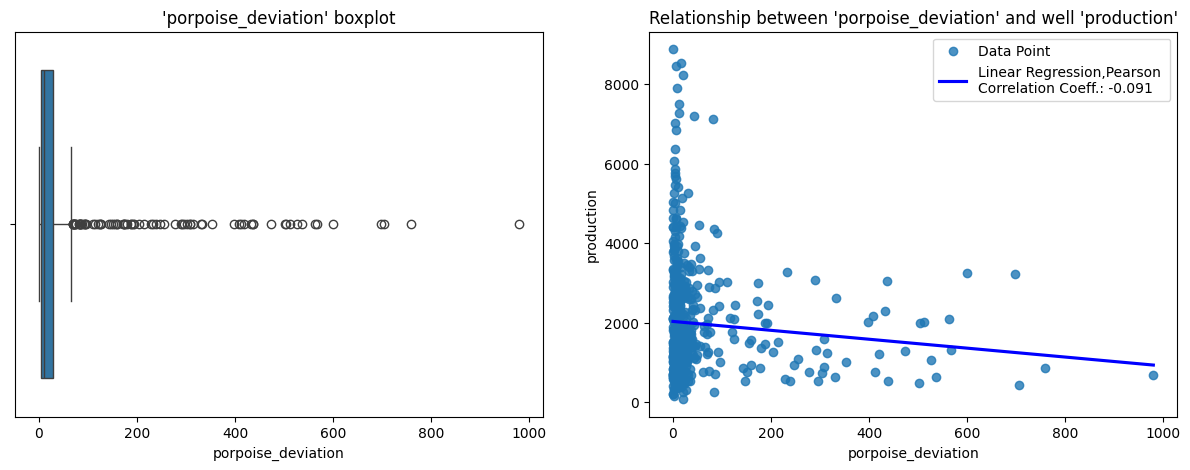

In [36]:
feature = 'porpoise_deviation'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'operator' and well 'production'")

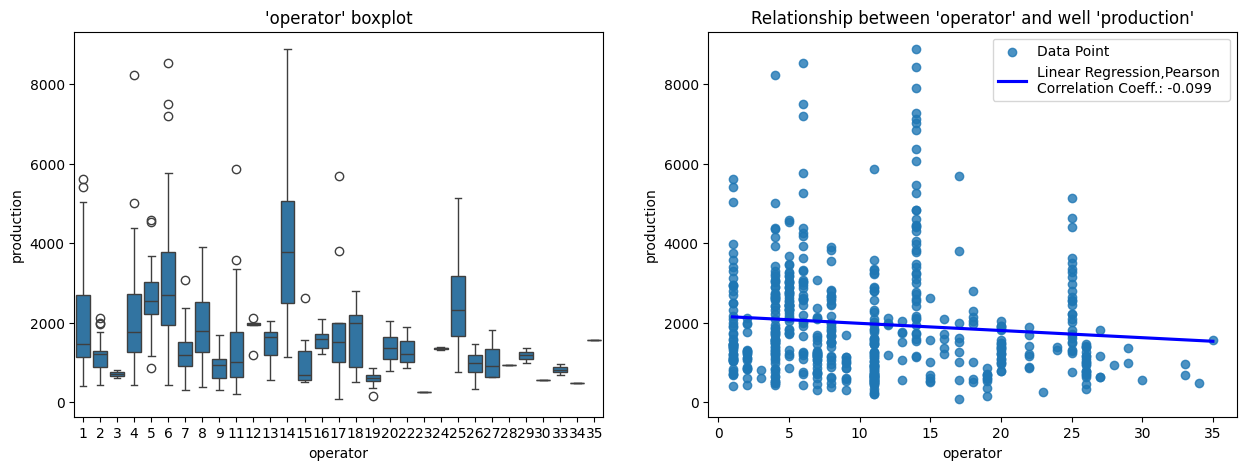

In [37]:
feature = 'operator'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, y='production', ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'br' and well 'production'")

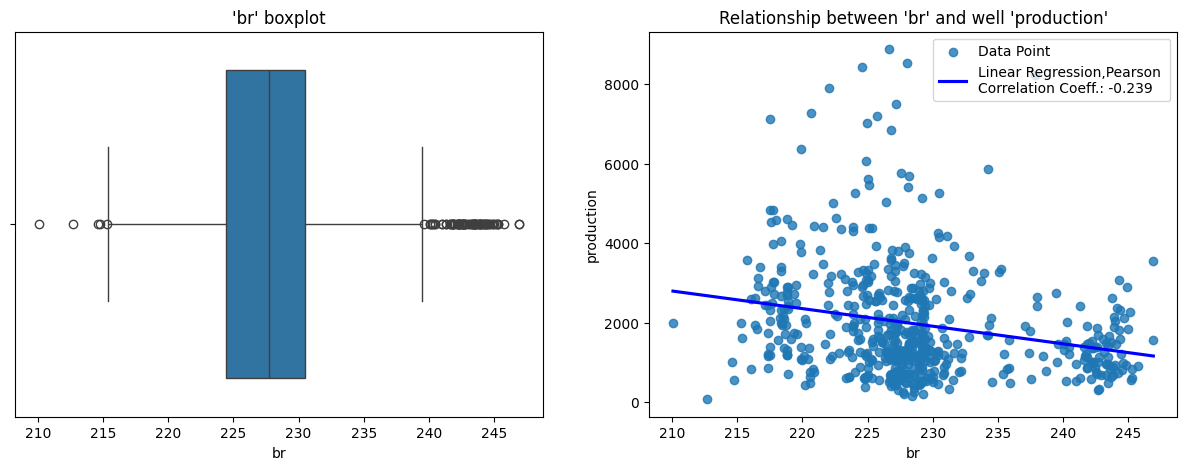

In [38]:
feature = 'br'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'toc' and well 'production'")

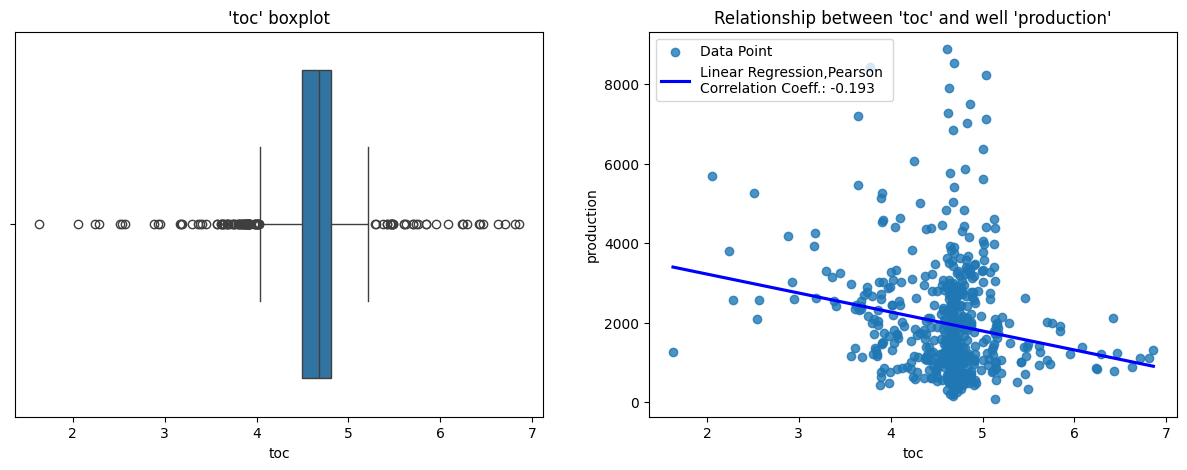

In [39]:
feature = 'toc'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'p-velocity' and well 'production'")

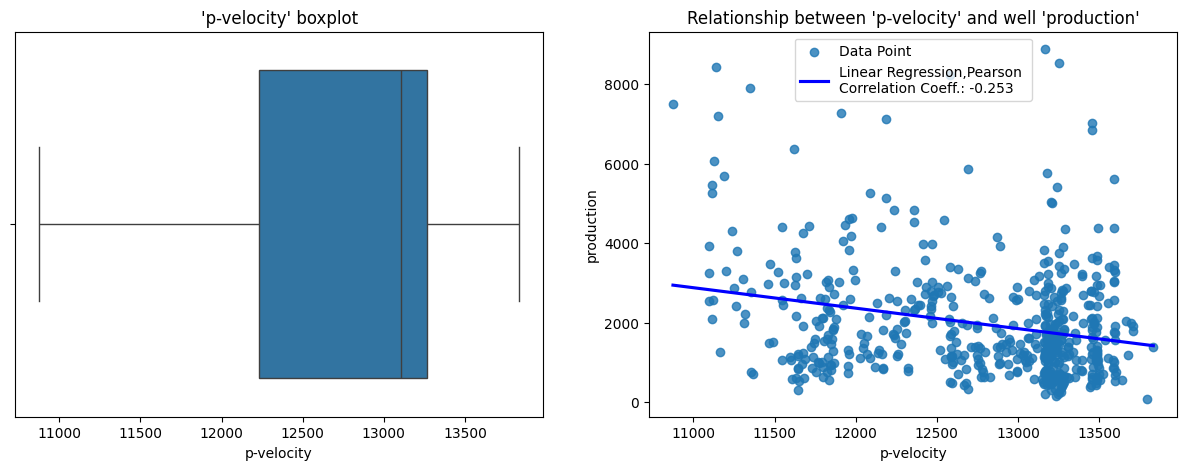

In [40]:
feature = 'p-velocity'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "Relationship between 'age' and well 'production'")

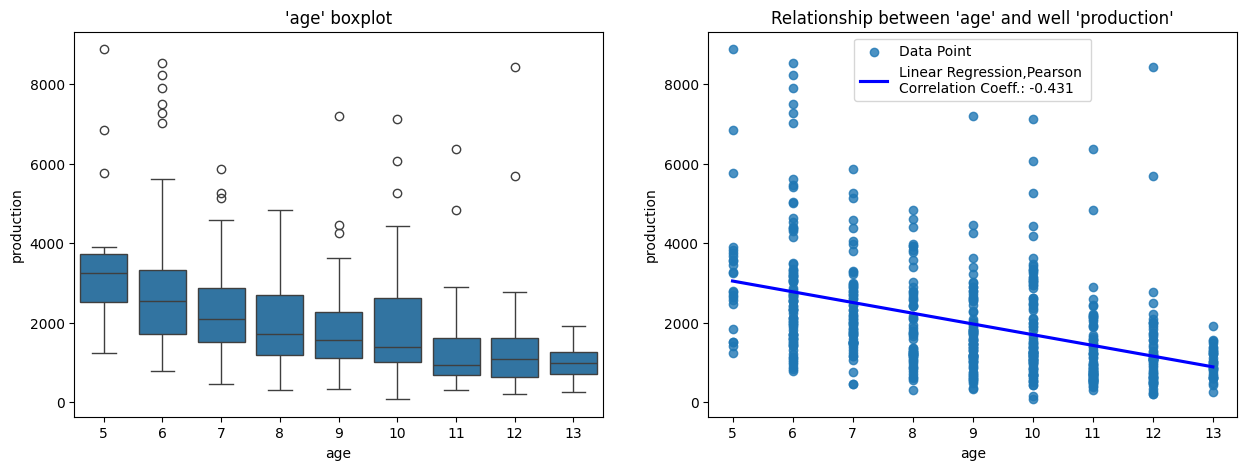

In [41]:
feature = 'age'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, y='production', ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.regplot(data=df2, x=feature, y='production', ci=0, line_kws=dict(color="b"), ax=ax[1])
ax[1].legend(labels=['Data Point', 
                   'Linear Regression,Pearson \nCorrelation Coeff.: ' + str(round(df2[feature].corr(df2['production']), ndigits=3)) 
                    ])
ax[1].set_title("Relationship between '"+ str(feature) + "' and well 'production'")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, "'production' histogram")

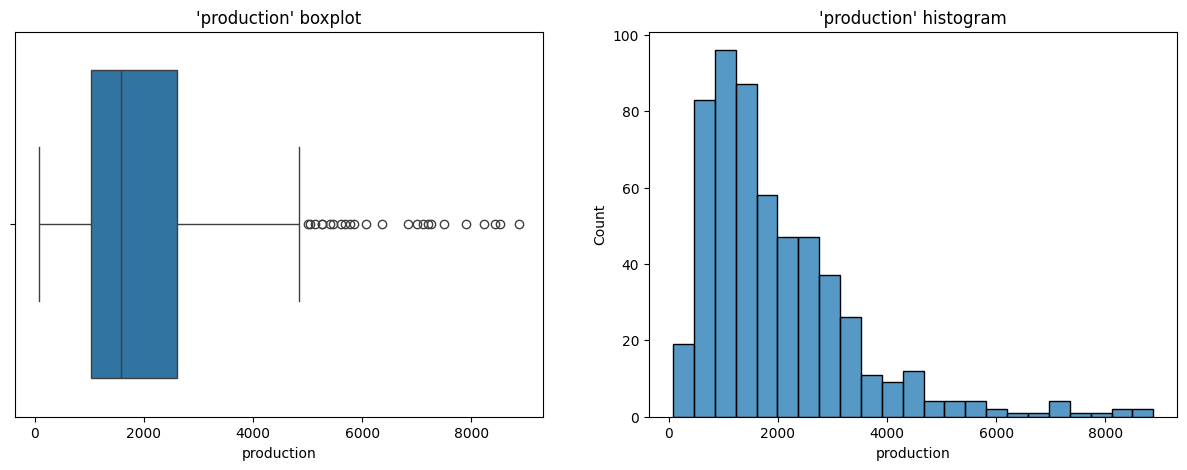

In [42]:
feature = 'production'
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(data=df2, x=feature, ax=ax[0])
ax[0].set_title("'"+str(feature)+"' boxplot")

sns.histplot(data=df2, x=feature, ax=ax[1])
ax[1].set_title("'"+str(feature)+"' histogram")


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 836
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   treatment_company     558 non-null    int64  
 1   operator              558 non-null    int64  
 2   age                   558 non-null    int64  
 3   azimuth               558 non-null    float64
 4   md                    558 non-null    int64  
 5   tvd                   558 non-null    float64
 6   porpoise_deviation    558 non-null    float64
 7   porpoise_count        558 non-null    int64  
 8   shale_footage         558 non-null    int64  
 9   acoustic_impedance    558 non-null    float64
 10  log_permeability      558 non-null    float64
 11  toc                   558 non-null    float64
 12  vcl                   558 non-null    float64
 13  p-velocity            558 non-null    float64
 14  pump_rate             558 non-null    int64  
 15  proppant_fluid_ratio  558 no

In [44]:
prod_25_percent = df2['production'].quantile(0.25)
prod_75_percent = df2['production'].quantile(0.75)
iqr = prod_75_percent - prod_25_percent
upper_limit = prod_75_percent + 1.5 * iqr
lower_limit = prod_25_percent - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

Lower limit: -1356.5033207499996
Upper limit: 4997.40837925


In [45]:
outliers = df2[(df2['production'] > upper_limit) | (df2['production'] < lower_limit)]
print(outliers.info())
outliers

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 836
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   treatment_company     24 non-null     int64  
 1   operator              24 non-null     int64  
 2   age                   24 non-null     int64  
 3   azimuth               24 non-null     float64
 4   md                    24 non-null     int64  
 5   tvd                   24 non-null     float64
 6   porpoise_deviation    24 non-null     float64
 7   porpoise_count        24 non-null     int64  
 8   shale_footage         24 non-null     int64  
 9   acoustic_impedance    24 non-null     float64
 10  log_permeability      24 non-null     float64
 11  toc                   24 non-null     float64
 12  vcl                   24 non-null     float64
 13  p-velocity            24 non-null     float64
 14  pump_rate             24 non-null     int64  
 15  proppant_fluid_ratio  24 non-

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,5.00,0.42,13592.23,83,1.23,1126.425319,225.000000,5614.947951
55,4,14,6,21.959999,12874,7535.0,4.65,3,2152,34570.38,0.14,3.64,0.62,11117.56,96,1.11,1009.845736,225.142857,5463.968098
91,11,14,10,-54.220001,15465,7366.0,30.90,4,4174,34371.58,0.30,3.91,0.59,11113.51,81,1.06,812.101972,224.000000,5262.395867
109,4,4,6,-40.139999,20870,7915.0,3.39,3,2103,34235.23,0.35,4.32,0.71,13211.25,88,1.31,1357.673598,222.357143,5013.576293
147,4,14,6,-38.360001,22807,6995.0,7.80,24,9872,32892.64,0.87,4.63,0.49,11347.52,101,1.09,1573.481300,222.071429,7909.584263
170,4,14,6,-45.099998,17845,7038.0,12.32,4,3983,34290.24,1.10,4.62,0.45,11911.21,104,1.16,1291.751191,220.642857,7269.339425
177,3,1,6,-42.880001,17565,6440.0,10.40,4,3135,34098.48,0.29,4.69,0.60,13239.05,90,1.48,1200.321662,228.071429,5410.382164
178,12,17,12,-29.299999,13843,7935.0,4.96,10,5937,35337.23,0.00,2.06,0.64,11186.02,80,1.25,805.926678,228.214286,5694.299028
205,9,6,5,-5.690000,16979,8782.0,5.08,4,6132,32627.37,0.47,4.65,0.58,13177.63,78,1.85,1307.537075,227.571429,5772.391307
225,16,14,12,-33.905735,14600,7283.0,5.22,5,3519,35012.49,0.10,3.77,0.62,11137.39,80,1.06,910.876233,224.571429,8444.751759


In [46]:
df3 = df2[df2['production']<upper_limit]

## 2.4. Export dataset for data preprocessing and model training

In [47]:
df3.to_csv('features_dataset.csv', index=False)
outliers.to_csv('outliers_dataset.csv', index=False)
print('Done. ')

Done. 
